In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
features = ["SepalLengthCm", "PetalLengthCm"]

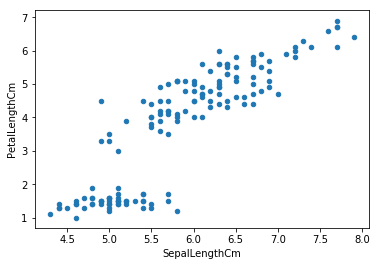

In [6]:
df.plot.scatter(features[0], features[1])

In [9]:
X = df[features].values

In [11]:
X = (X - X.mean(axis = 0))/X.std(axis=0)

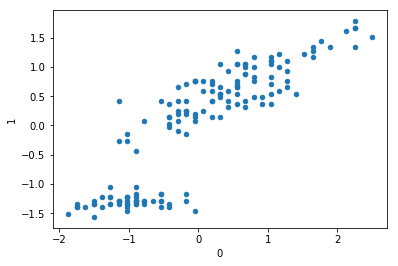

In [13]:
pd.DataFrame(X).plot.scatter(0, 1)

In [18]:
k = 3
kmeans = cluster.KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [15]:
y_predict = kmeans.predict(X)

In [16]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

In [17]:
pd.Series(y_predict).value_counts()

1    54
0    53
2    43
dtype: int64

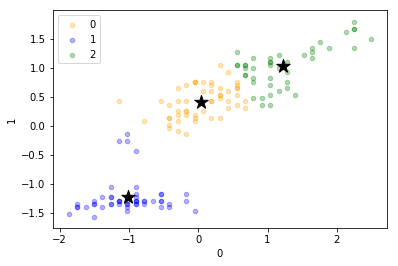

In [56]:
fig, ax = plt.subplots()
colors = ["orange", "blue", "green"]
for i in range(k):
    pd.DataFrame(X[y_predict == i]).plot.scatter(0, 1, color = colors[i], ax = ax, alpha = 0.3, label = i)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, marker = "*", s = 200, color = "black")

In [55]:
distances = np.zeros((len(df),), np.float32)
for i in range(k):
    gr = X[y_predict == i]
    center = kmeans.cluster_centers_[i]
    distances[y_predict == i] = np.sqrt(np.sum((gr - center) ** 2, axis = 1))
    #print(gr)

In [39]:
points = pd.DataFrame(X)
points["cluster"] = y_predict
points["distance"] = distances

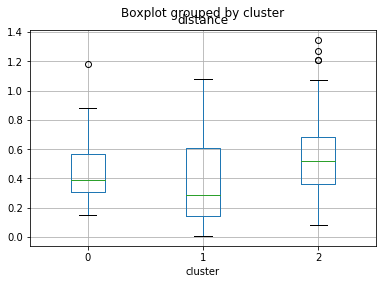

In [43]:
points.boxplot(by = "cluster", column = ["distance"])

In [49]:
def is_outlier(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    uw = min(np.max(y), q3 + 1.5 * iqr)
    lw = max(np.min(y), q1 - 1.5 * iqr)
    print("uw:", uw, "lw: ", lw)
    return np.where((y > uw) | (y < lw), True, False)

In [53]:
points["outlier"] = False
for i in range(k):
    points.loc[points.cluster == i, "outlier"] = is_outlier(points[points.cluster == i].distance)

uw: 0.9556873291730881 lw:  0.15323459
uw: 1.0815223 lw:  0.0068134204
uw: 1.1686278358101845 lw:  0.08020924


In [54]:
points[points.outlier]

,0,1,cluster,distance,outlier,outliers
106,-1.143017,0.421564,0,1.179680,True,True
117,2.249683,1.672610,2,1.206365,True,True
118,2.249683,1.786341,2,1.270726,True,True
122,2.249683,1.672610,2,1.206365,True,True
131,2.492019,1.502013,2,1.348258,True,True


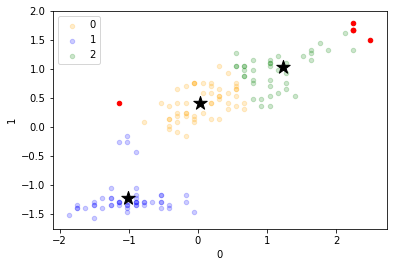

In [60]:
fig, ax = plt.subplots()
colors = ["orange", "blue", "green"]
for i in range(k):
    pd.DataFrame(X[y_predict == i]).plot.scatter(0, 1, color = colors[i], ax = ax, alpha = 0.2, label = i)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, marker = "*", s = 200, color = "black")
points[points.outlier].plot.scatter(0, 1, color = "red", ax = ax)

In [62]:
np.percentile(points.distance, [95, 99, 99.9])

array([1.0302342 , 1.23918885, 1.33670574])

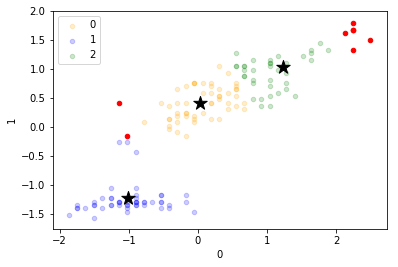

In [64]:
fig, ax = plt.subplots()
colors = ["orange", "blue", "green"]
for i in range(k):
    pd.DataFrame(X[y_predict == i]).plot.scatter(0, 1, color = colors[i], ax = ax, alpha = 0.2, label = i)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, marker = "*", s = 200, color = "black")
points[points.distance > 1.0302342].plot.scatter(0, 1, color = "red", ax = ax)